In [1]:
%pylab inline
from sklearn.naive_bayes import GaussianNB
from distribuciones import paralelo, diagonal, espirales_anidadas
import pandas as pd
from sklearn.naive_bayes import GaussianNB

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


1) Dimensionalidad: Repita el punto de dimensionalidad del Práctico 1, usando el Clasificador Naive-Bayes con Gaussianas. Genere una gráfica incluyendo también los resultados de redes y árboles.

Genere datasets con C = 0.78, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando esta vez el valor de d según la siguiente lista: 2, 4, 8, 16, 32. Para cada valor de d cree 20 conjuntos distintos de entrenamiento, y uno solo de test. Genere una gráfica del train y test error en función de d para el problema "paralelo" y el "diagonal" (todos en la misma gráfica). Discuta los resultados.

In [3]:
# resultados tp1

diag_1 = np.loadtxt('../tp2/ej4_diagonal.txt')
para_1 = np.loadtxt('../tp2/ej4_paralelo.txt')

# resultados tp2

In [17]:
C = 0.78
ntrain = 250
ntest  = 10000
dimension = [2,4,8,16,32]

In [13]:
data = paralelo(20,n,C)
y = data['clases'].values
X = data.drop(['clases'],axis = 1).values

In [14]:
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

In [15]:
test = paralelo(20,n,C)
y = test['clases'].values
X = test.drop(['clases'],axis = 1).values

prediccion_training = clf.predict(X)
correctos, = np.where(prediccion_training == y)
print(len(correctos)/len(y))

0.88


In [30]:
test_error_d = []
train_error_d = []
    
for d in dimension:

    accuracy_max = -99
      
    for i in range(20):
        
        dtrain = diagonal(d,ntrain,C)
        y_d = dtrain['clases'].values
        X_d = dtrain.drop(['clases'],axis = 1).values
    
        clf = GaussianNB()
        clf.fit(X_d, y_d)
        
        prediccion_training = clf.predict(X_d)
        correctos, = np.where(prediccion_training == y_d)
        accuracy = len(correctos)/len(y_d)
        
        if accuracy > accuracy_max:
            accuracy_max = accuracy
            bclf = clf
    
    dtest = diagonal(d,ntest,C)
    y = dtest['clases'].values
    X = dtest.drop(['clases'],axis = 1).values
    prediccion_training = bclf.predict(X)
    correctos, = np.where(prediccion_training == y)
    accuracy = len(correctos)/len(y)
    
    test_error_d.append(1 - accuracy)
    train_error_d.append(1 - accuracy_max)

In [28]:
test_error_p = []
train_error_p = []
    
for d in dimension:

    accuracy_max = -99
      
    for i in range(20):
        
        dtrain = diagonal(d,ntrain,C)
        y_d = dtrain['clases'].values
        X_d = dtrain.drop(['clases'],axis = 1).values
    
        clf = GaussianNB()
        clf.fit(X_d, y_d)
        
        prediccion_training = clf.predict(X_d)
        correctos, = np.where(prediccion_training == y_d)
        accuracy = len(correctos)/len(y_d)
        
        if accuracy > accuracy_max:
            accuracy_max = accuracy
            bclf = clf
    
    dtest = diagonal(d,ntest,C)
    y = dtest['clases'].values
    X = dtest.drop(['clases'],axis = 1).values
    prediccion_training = bclf.predict(X)
    correctos, = np.where(prediccion_training == y)
    accuracy = len(correctos)/len(y)
    
    test_error_p.append(1 - accuracy)
    train_error_p.append(1 - accuracy_max)

Text(0, 0.5, 'ACCURACY')

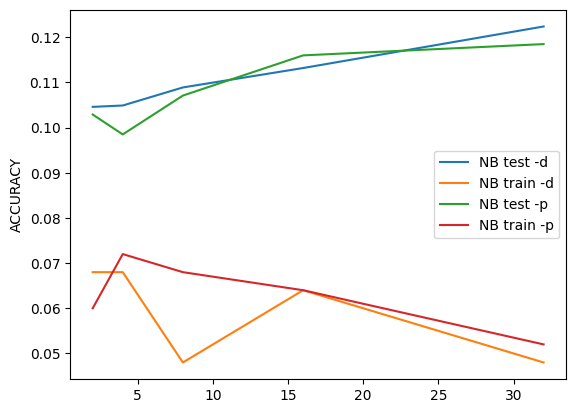

In [31]:
plt.plot(dimension,test_error_d,label='NB test -d')
plt.plot(dimension,train_error_d,label='NB train -d')
plt.plot(dimension,test_error_p,label='NB test -p')
plt.plot(dimension,train_error_p,label='NB train -p')
plt.legend()
plt.ylabel('ACCURACY')